In [130]:
import pandas as pd
import matplotlib.pyplot as plt

file = pd.read_csv('cereal.csv')
cereals = pd.DataFrame(file)
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70.0,4,1,130,10.0,5.0,6.0,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3,5,15,2.0,8.0,8.0,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4,1,260,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4,0,140,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110.0,2,2,200,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2,1,250,0.0,21.0,3.0,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110.0,1,1,140,0.0,13.0,12.0,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100.0,3,1,230,3.0,17.0,3.0,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100.0,3,1,200,3.0,17.0,3.0,110,25,1,1.0,1.00,51.592193


# Which manufacturers produce cereals with a calorie count above 120?

In [131]:
high_calories = cereals[cereals['calories'] > 120]
mfr_calories = high_calories['mfr'].value_counts()

for mfr, count in mfr_calories.items():
    print(f"Manufacturer {mfr} has {count} cereals with a calorie content above 120.")

Manufacturer G has 3 cereals with a calorie content above 120.
Manufacturer K has 3 cereals with a calorie content above 120.
Manufacturer R has 2 cereals with a calorie content above 120.


# What is the correlation between higher calories and the sugar and fat content?

In [132]:
calorie_vs_sugars_fats = ['name', 'mfr', 'calories', 'sugars', 'fat']
grouped_by = cereals[calorie_vs_sugars_fats]
sort_by_calories = grouped_by.sort_values(by='calories', ascending=False).iloc[0:15]
sort_by_calories


,name,mfr,calories,sugars,fat
46,Mueslix Crispy Blend,K,160.0,13.0,2
44,Muesli Raisins; Dates; & Almonds,R,150.0,11.0,3
45,Muesli Raisins; Peaches; & Pecans,R,150.0,11.0,3
39,Just Right Fruit & Nut,K,140.0,9.0,1
70,Total Raisin Bran,G,140.0,14.0,1
49,Nutri-Grain Almond-Raisin,K,140.0,7.0,2
7,Basic 4,G,130.0,8.0,2
51,Oatmeal Raisin Crisp,G,130.0,10.0,2
34,Great Grains Pecan,P,120.0,4.0,3
10,Cap'n'Crunch,Q,120.0,12.0,2


In [133]:
print(cereals['fat'].mean())
print(cereals['sugars'].mean())

1.0129870129870129
6.638888888888889


The cereals in this list are the top 15 with the highest calories. The data indicates that the cereals with higher calories are like to have an increased amount of sugars and fats.

To visualise this please see the scatter graph below.

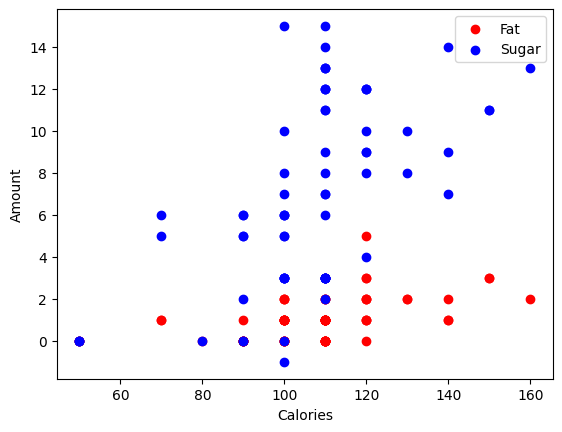

In [134]:
plt.scatter(cereals['calories'], cereals['fat'], c='red', label='Fat')
plt.scatter(cereals['calories'], cereals['sugars'], c='blue', label='Sugar')
plt.xlabel('Calories')
plt.ylabel('Amount')
plt.legend() 


# Index the data set by Manufacturer.

In [135]:
cereals.set_index('mfr', inplace=True)
cereals

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
N,100% Bran,C,70.0,4,1,130,10.0,5.0,6.0,280,25,3,1.0,0.33,68.402973
Q,100% Natural Bran,C,120.0,3,5,15,2.0,8.0,8.0,135,0,3,1.0,1.00,33.983679
K,All-Bran,C,70.0,4,1,260,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
K,All-Bran with Extra Fiber,C,50.0,4,0,140,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
R,Almond Delight,C,110.0,2,2,200,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G,Triples,C,110.0,2,1,250,0.0,21.0,3.0,60,25,3,1.0,0.75,39.106174
G,Trix,C,110.0,1,1,140,0.0,13.0,12.0,25,25,2,1.0,1.00,27.753301
R,Wheat Chex,C,100.0,3,1,230,3.0,17.0,3.0,115,25,1,1.0,0.67,49.787445


# Index the data set by Sodium content.

In [136]:
cereals.set_index('sodium', inplace=True)
cereals

,name,type,calories,protein,fat,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
sodium,,,,,,,,,,,,,,
130,100% Bran,C,70.0,4,1,10.0,5.0,6.0,280,25,3,1.0,0.33,68.402973
15,100% Natural Bran,C,120.0,3,5,2.0,8.0,8.0,135,0,3,1.0,1.00,33.983679
260,All-Bran,C,70.0,4,1,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
140,All-Bran with Extra Fiber,C,50.0,4,0,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
200,Almond Delight,C,110.0,2,2,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Triples,C,110.0,2,1,0.0,21.0,3.0,60,25,3,1.0,0.75,39.106174
140,Trix,C,110.0,1,1,0.0,13.0,12.0,25,25,2,1.0,1.00,27.753301
230,Wheat Chex,C,100.0,3,1,3.0,17.0,3.0,115,25,1,1.0,0.67,49.787445


I've noticed that indexing by sodium content AFTER indexing by manufacturer, the new index replaces the old one, however this seems to remove the 'mfr' column from my second table.